# 1. Import libraries

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
# %config InlineBackend.figure_format = 'svg' 
# plt.style.use('ggplot')

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
SAVE_PATH_FIG = '.\projects_temp-figs'
FIGURE_FORMAT = 'svg'

# 2. Create synthetic data

In [16]:
def my_synthetic_data():
    # Generate a synthetic binary classification dataset
    x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    
    # Split the dataset into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    # Train a logistic regression classifier
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    
    # Predict probabilities on the test set
    y_pred = clf.predict_proba(x_test)[:, 1]  # probabilities for the positive class
    
    # The y_test and y_pred can be used to test the plot_roc_and_calculate_auc function
    return y_test, y_pred

y_test, y_pred = my_synthetic_data()

# 3. Visualize ROC-curve with TPR and FPR 

In [17]:
'''
def my_plot_roc_binary(y_true, y_scores, save_path, figure_name):
    """
    Plots the Receiver Operating Characteristic (ROC) curve and calculates the 
    Area Under the Curve (AUC) for a binary classifier.
    
    The function takes two arguments: `y_true`, an array of true binary labels, 
    and `y_scores`, an array of predicted scores/probabilities from the classifier. 
    It calculates the True Positive Rate (TPR) and False Positive Rate (FPR) at 
    various threshold settings derived from the predicted scores. The ROC curve 
    is then plotted with TPR against FPR, and the AUC is calculated using the 
    trapezoidal rule.
    
    Parameters:
    y_true (array-like): True binary labels. Must be the same length as `y_scores`.
    y_scores (array-like): Predicted scores/probabilities for the positive class.
    
    Returns:
    float: The AUC (Area Under Curve) value, a measure of the classifier's performance.
    
    Note:
    This function assumes that the positive class is labeled as '1' and the negative
    class as '0'. The `y_scores` array should contain probabilities or scores that 
    reflect the likelihood of belonging to the positive class.
    """
    # Define the figure name and path
    my_save_path = os.path.join(save_path, figure_name)

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)
    
    # Sort scores and corresponding true values
    desc_score_indices = np.argsort(y_scores)[::-1]
    y_scores = y_scores[desc_score_indices]
    y_true = y_true[desc_score_indices]

    # Temporarily ignore divide by zero warnings
    np.seterr(divide='ignore', invalid='ignore')
    
    # Compute True Positive and False Positive Counts
    tp = np.cumsum(y_true)  # Cumulative sum of true positives
    fp = np.cumsum(1 - y_true)  # Cumulative sum of false positives
    tn = fp[-1] - fp  # True negatives at each threshold
    fn = tp[-1] - tp  # False negatives at each threshold

    # Calculate TPR and FPR
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    # Replace NaNs in FPR with zero
    fpr = np.nan_to_num(fpr)
    tpr = np.nan_to_num(tpr)

    # Restore the default error handling for NumPy
    np.seterr(divide='warn', invalid='warn')
    
    # Calculate AUC using the trapezoidal rule
    roc_auc = np.trapz(tpr, fpr)

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
    plt.legend(loc="lower right", fontsize=14)

    plt.savefig(my_save_path, format=FIGURE_FORMAT, bbox_inches='tight')
    print(f"Plot saved to {save_path} as {figure_name}")
    # plt.gcf().set_dpi(200)
    plt.show()

    return roc_auc

'''

'\ndef my_plot_roc_binary(y_true, y_scores, save_path, figure_name):\n    """\n    Plots the Receiver Operating Characteristic (ROC) curve and calculates the \n    Area Under the Curve (AUC) for a binary classifier.\n    \n    The function takes two arguments: `y_true`, an array of true binary labels, \n    and `y_scores`, an array of predicted scores/probabilities from the classifier. \n    It calculates the True Positive Rate (TPR) and False Positive Rate (FPR) at \n    various threshold settings derived from the predicted scores. The ROC curve \n    is then plotted with TPR against FPR, and the AUC is calculated using the \n    trapezoidal rule.\n    \n    Parameters:\n    y_true (array-like): True binary labels. Must be the same length as `y_scores`.\n    y_scores (array-like): Predicted scores/probabilities for the positive class.\n    \n    Returns:\n    float: The AUC (Area Under Curve) value, a measure of the classifier\'s performance.\n    \n    Note:\n    This function assume

In [18]:
# my_auc = my_plot_roc_binary(y_test, y_pred, SAVE_PATH_FIG, figure_name='my_plot_roc_binary')

# 4. Visualize ROC-curve with sklearn

In [19]:
def plot_roc_skl_binary(y_true, y_scores, save_path, figure_name):
    """
    Parameters:
    y_true (array-like): True binary labels. Must be the same length as `y_scores`.
    y_scores (array-like): Predicted probabilities or decision function scores for
                           the positive class. Must be a 1D array.
    Returns:
    float: The AUC (Area Under Curve) value, indicating the performance of the classifier.
    Note:
    The function assumes a binary classification task where the positive class is labeled as '1'
    and the negative class as '0'. The `y_scores` should contain values that represent the
    likelihood of the positive class, typically ranging between 0 and 1.
    """
    # Define the figure name and path
    my_save_path = os.path.join(save_path, figure_name + f'.{FIGURE_FORMAT}')

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Calculate False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Calculate AUC
    roc_auc = roc_auc_score(y_true, y_scores)

    # Estimate the maximum title length based on figure size and average character width
    max_title_length = 40  # This is an estimated value for a 6-inch wide figure

    # Construct the title and split it into two lines if necessary
    full_title = f'ROC-крива для {figure_name}'
    if len(full_title) > max_title_length:
        split_index = max_title_length // 2  # Approximate middle of the string
        # Find the nearest space to avoid splitting a word
        while full_title[split_index] != ' ' and split_index < len(full_title):
            split_index += 1
        title_line1 = full_title[:split_index]
        title_line2 = full_title[split_index:]
        title = title_line1.strip() + '\n' + title_line2.strip()
    else:
        title = full_title
    
    # Plotting ROC Curve
    plt.figure(figsize=(6,4), dpi=300)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-крива (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=12, fontweight='bold', color='#333333')
    plt.yticks(fontsize=12, fontweight='bold', color='#333333')
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', color='#333333')
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend(loc="lower right", fontsize=14)

    plt.savefig(my_save_path, format=FIGURE_FORMAT, bbox_inches='tight')
    print(f"Plot saved to {save_path} as {figure_name}")
    # plt.gcf().set_dpi(200)
    plt.show()

    return roc_auc


Plot saved to .\projects_temp-figs as my_plot_roc_sk


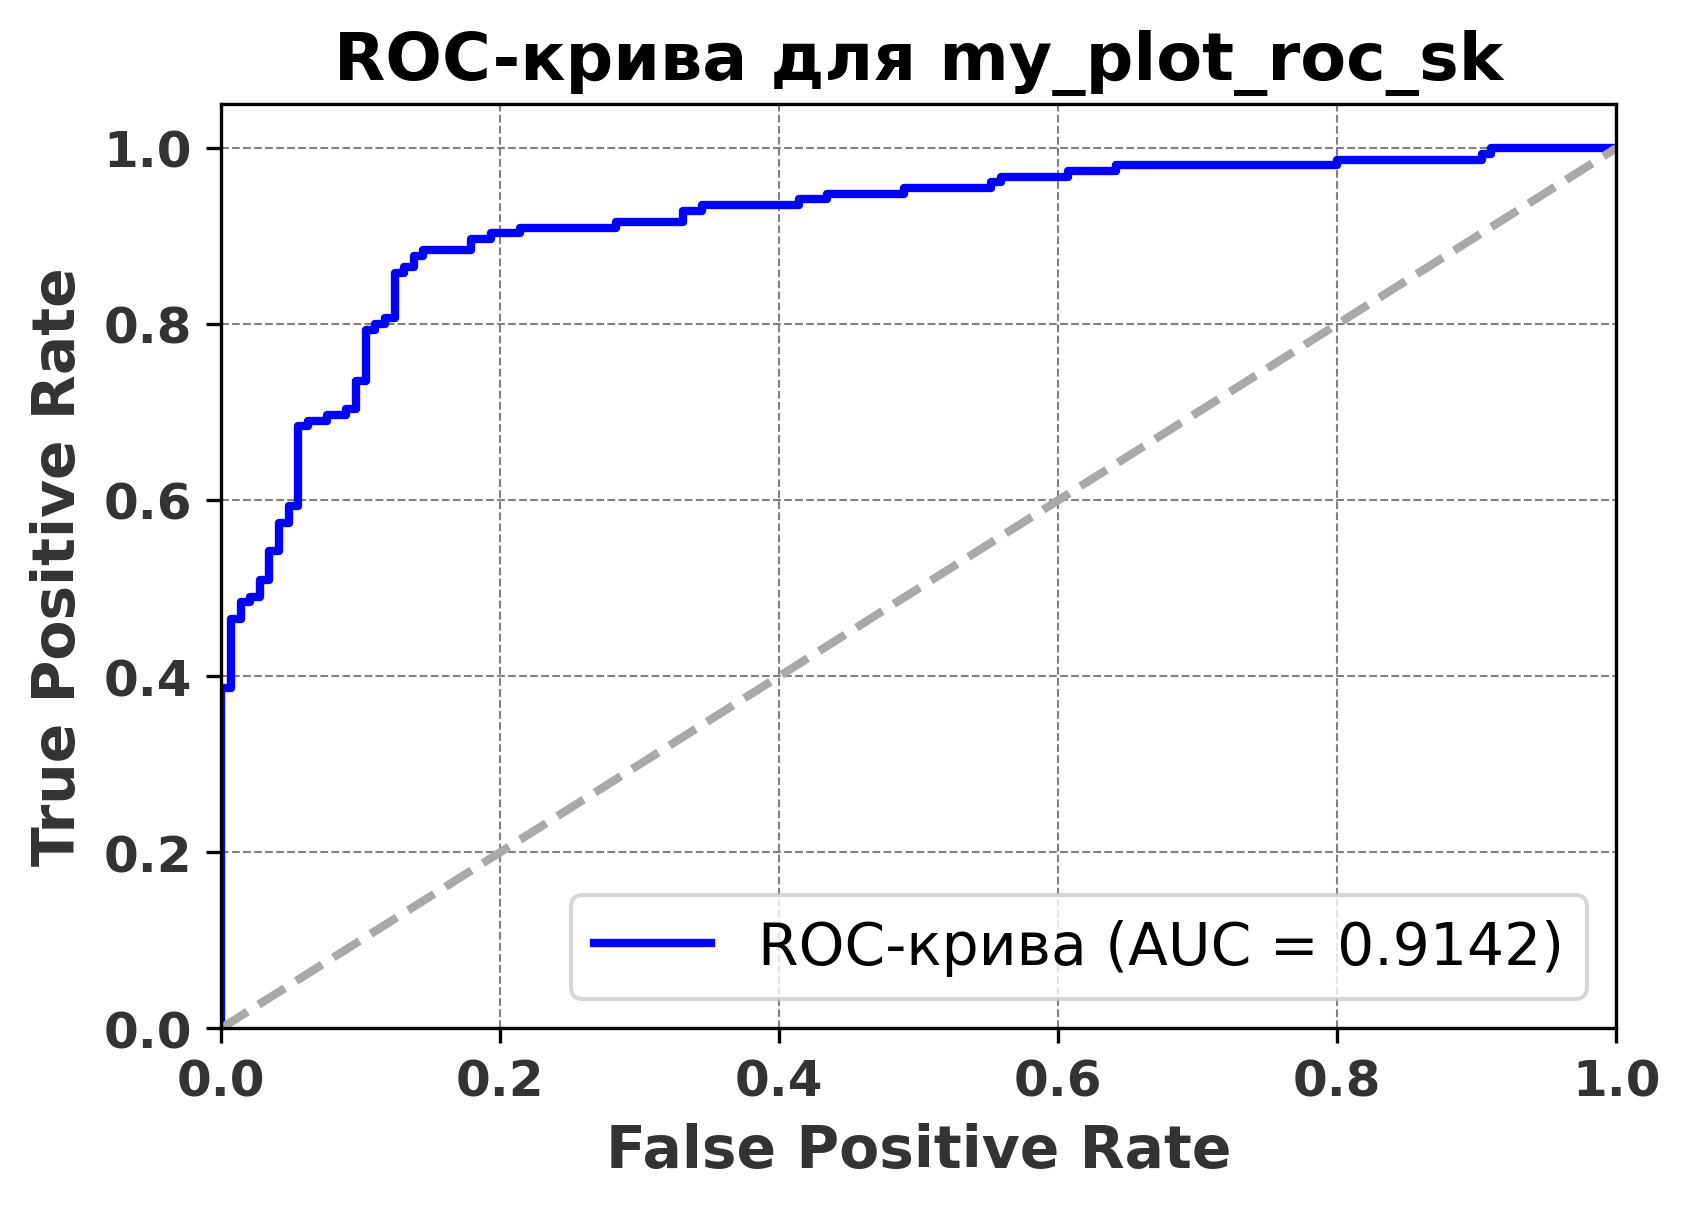

In [20]:
auc_skl = plot_roc_skl_binary(y_test, y_pred, SAVE_PATH_FIG, figure_name='my_plot_roc_sk')

# 5. Visualize Precision-Recall curve with sklearn

In [21]:
def plot_precision_recall_skl_binary(y_true, y_scores, save_path, figure_name):
    """
    :param y_true: 
    :param y_scores: 
    :param save_path: 
    :param figure_name: 
    :return: 
    """
    # Define the figure name and path
    my_save_path = os.path.join(save_path, figure_name + f'.{FIGURE_FORMAT}')

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

    # Calculate Average Precision
    average_precision = average_precision_score(y_true, y_scores)

    # Estimate the maximum title length based on figure size and average character width
    max_title_length = 40  # This is an estimated value for a 6-inch wide figure
    
    # Construct the title and split it into two lines if necessary
    full_title = f'Крива Precision-Recall для {figure_name}'
    if len(full_title) > max_title_length:
        split_index = max_title_length // 2  # Approximate middle of the string
        # Find the nearest space to avoid splitting a word
        while full_title[split_index] != ' ' and split_index < len(full_title):
            split_index += 1
        title_line1 = full_title[:split_index]
        title_line2 = full_title[split_index:]
        title = title_line1.strip() + '\n' + title_line2.strip()
    else:
        title = full_title
    
    # Plotting Precision-Recall Curve
    plt.figure(figsize=(6,4), dpi=300)
    plt.plot(recall, precision, color='green', lw=2, label=f'Крива Precision-Recall (AP = {average_precision:.4f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=12, fontweight='bold', color='#333333')
    plt.yticks(fontsize=12, fontweight='bold', color='#333333')
    plt.xlabel('Recall', fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel('Precision', fontsize=14, fontweight='bold', color='#333333')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend(loc="lower left", fontsize=14)

    plt.savefig(my_save_path, format=FIGURE_FORMAT, bbox_inches='tight')
    print(f"Plot saved to {save_path} as {figure_name}")
    plt.show()

    # Creating a DataFrame for precision, recall, and average precision
    data = {
        'Metric': ['Precision', 'Recall', 'Average Precision'],
        'Value': [precision[-1], recall[-1], average_precision]
    }
    precision_recall_df = pd.DataFrame(data)
    # print(precision_recall_df)

    return precision, recall, average_precision


Plot saved to .\projects_temp-figs as my_plot_precision_sk


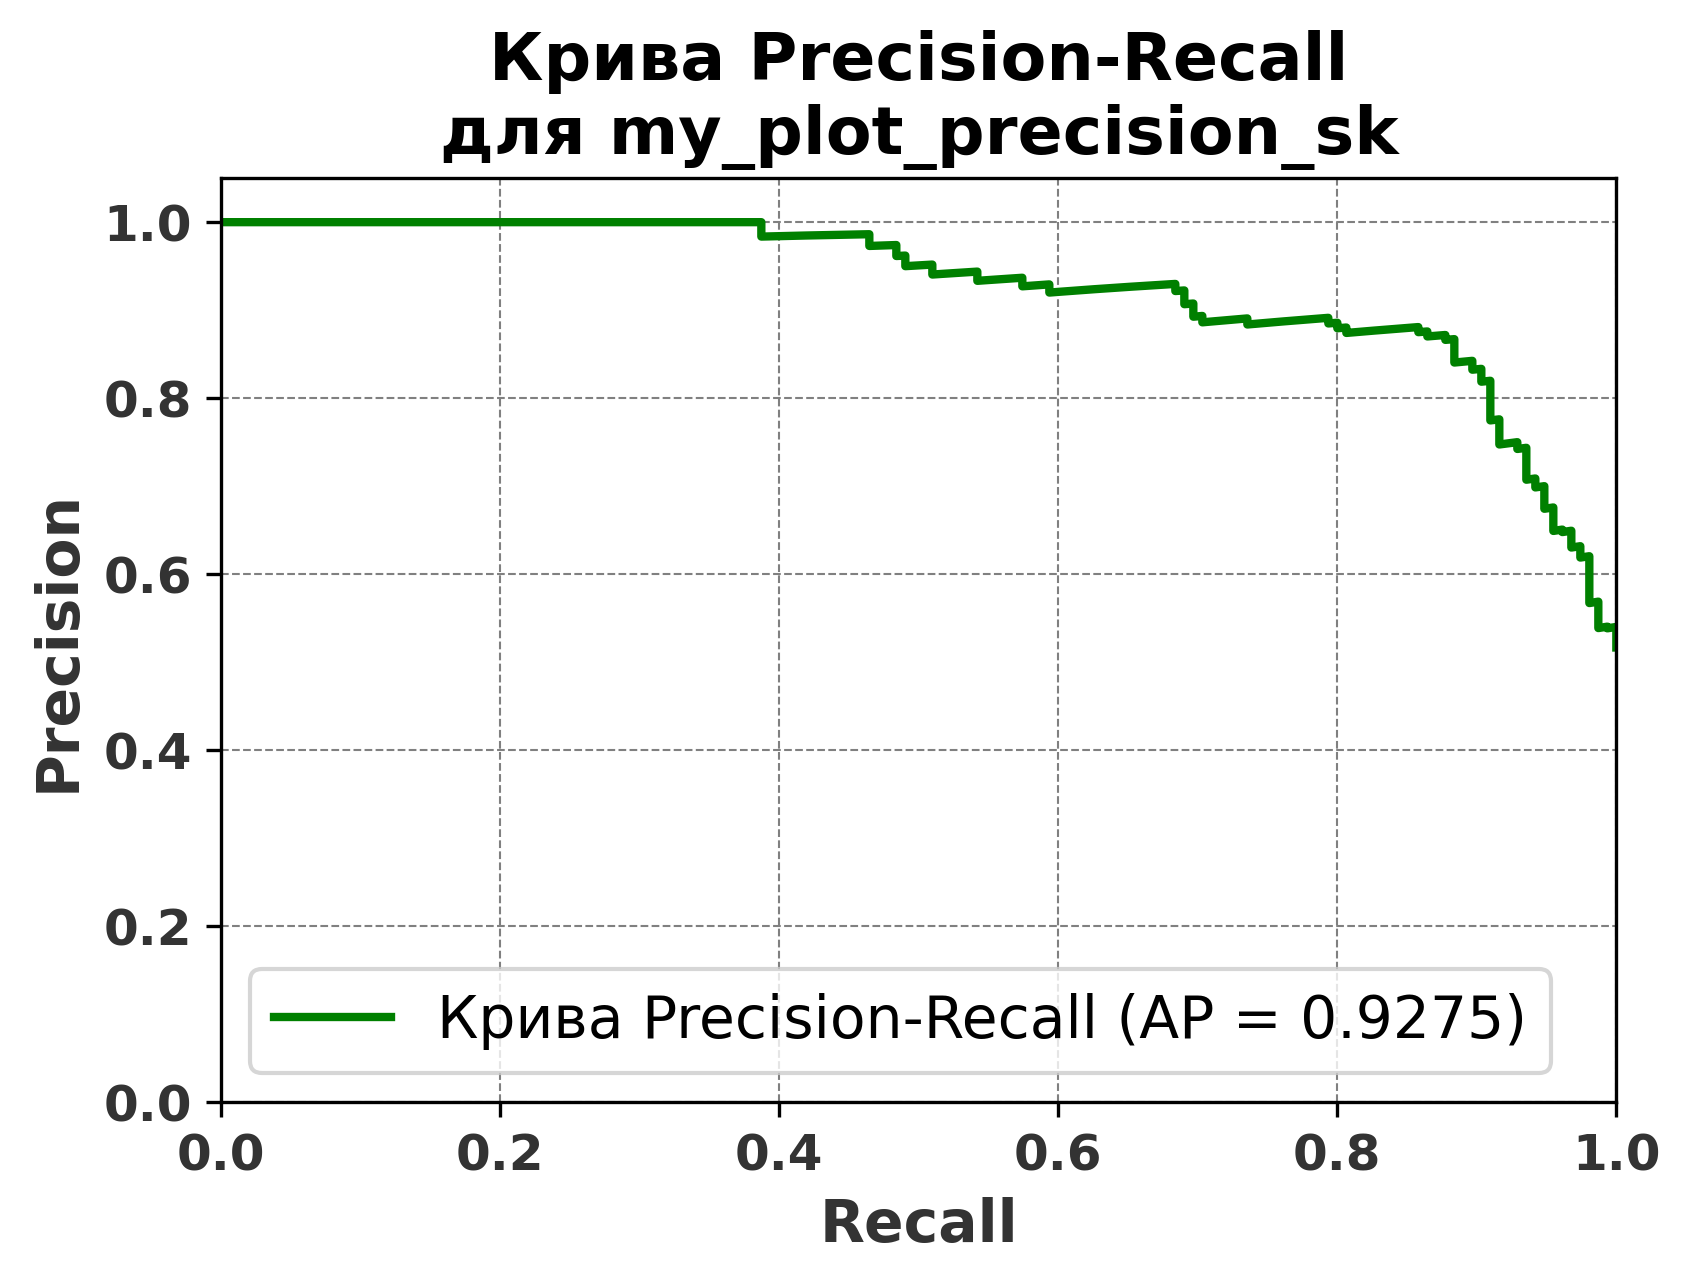

(array([0.51666667, 0.51839465, 0.52013423, 0.52188552, 0.52364865,
        0.52542373, 0.52721088, 0.52901024, 0.53082192, 0.53264605,
        0.53448276, 0.53633218, 0.53819444, 0.54006969, 0.53846154,
        0.54035088, 0.53873239, 0.54063604, 0.54255319, 0.54448399,
        0.54642857, 0.5483871 , 0.55035971, 0.55234657, 0.55434783,
        0.55636364, 0.55839416, 0.56043956, 0.5625    , 0.56457565,
        0.56666667, 0.56877323, 0.56716418, 0.56928839, 0.57142857,
        0.57358491, 0.57575758, 0.57794677, 0.58015267, 0.58237548,
        0.58461538, 0.58687259, 0.58914729, 0.59143969, 0.59375   ,
        0.59607843, 0.5984252 , 0.60079051, 0.6031746 , 0.60557769,
        0.608     , 0.61044177, 0.61290323, 0.61538462, 0.61788618,
        0.62040816, 0.61885246, 0.62139918, 0.62396694, 0.62655602,
        0.62916667, 0.63179916, 0.6302521 , 0.63291139, 0.63559322,
        0.63829787, 0.64102564, 0.64377682, 0.64655172, 0.64935065,
        0.64782609, 0.65065502, 0.64912281, 0.65

In [22]:
precision_skl = plot_precision_recall_skl_binary(y_test, y_pred, SAVE_PATH_FIG, figure_name='my_plot_precision_sk')
precision_skl

# 6. Extract data from a CSV file

In [23]:
# Load the uploaded CSV file into a pandas DataFrame
dataset_out = 'med_records_results.csv'
folder_out = './projects_outscope'
file_path_out = os.path.join(folder_out, dataset_out)

data_frame = pd.read_csv(file_path_out)

# Extract the two tables from the data frame
y_test_out = data_frame[['y_test']].to_numpy()
y_pred_out = data_frame[['y_pred']].to_numpy()

# Display the first few rows of each table for confirmation
# y_test_out[:5], y_pred_out[:5]

In [24]:
# figure_name_out = 'my_roc_out'
# my_auc_out = plot_roc_skl_binary(y_test_out, y_pred_out, folder_out, figure_name=figure_name_out)

# 7. Transform XLSX to CSV

In [25]:
'''
# Define the input and output folder paths
input_folder_excel = './projects_outscope/outscope_excel'
output_folder_csv = './projects_outscope/outscope_csv'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_csv):
    os.makedirs(output_folder_csv)

# Loop through each file in the input folder
for file in os.listdir(input_folder_excel):
    # Check if the file is an Excel file
    if file.endswith('.xlsx') or file.endswith('.xls'):
        # Construct the full file path
        input_file_path = os.path.join(input_folder_excel, file)

        # Read the Excel file
        df = pd.read_excel(input_file_path)

        # Construct the output file path (change extension to .csv)
        output_file_path = os.path.join(output_folder_csv, os.path.splitext(file)[0] + '.csv')

        # Save the DataFrame as a CSV file
        df.to_csv(output_file_path, index=False)

        print(f'Converted {file} to CSV and saved in {output_folder_csv}')

print("All Excel files have been converted to CSV.")
'''


'\n# Define the input and output folder paths\ninput_folder_excel = \'./projects_outscope/outscope_excel\'\noutput_folder_csv = \'./projects_outscope/outscope_csv\'\n\n# Create the output folder if it doesn\'t exist\nif not os.path.exists(output_folder_csv):\n    os.makedirs(output_folder_csv)\n\n# Loop through each file in the input folder\nfor file in os.listdir(input_folder_excel):\n    # Check if the file is an Excel file\n    if file.endswith(\'.xlsx\') or file.endswith(\'.xls\'):\n        # Construct the full file path\n        input_file_path = os.path.join(input_folder_excel, file)\n\n        # Read the Excel file\n        df = pd.read_excel(input_file_path)\n\n        # Construct the output file path (change extension to .csv)\n        output_file_path = os.path.join(output_folder_csv, os.path.splitext(file)[0] + \'.csv\')\n\n        # Save the DataFrame as a CSV file\n        df.to_csv(output_file_path, index=False)\n\n        print(f\'Converted {file} to CSV and saved in {ou

# 8. Draw ROC-curves from the CSV files

Plot saved to ./projects_outscope/outscope_figs as Донорство


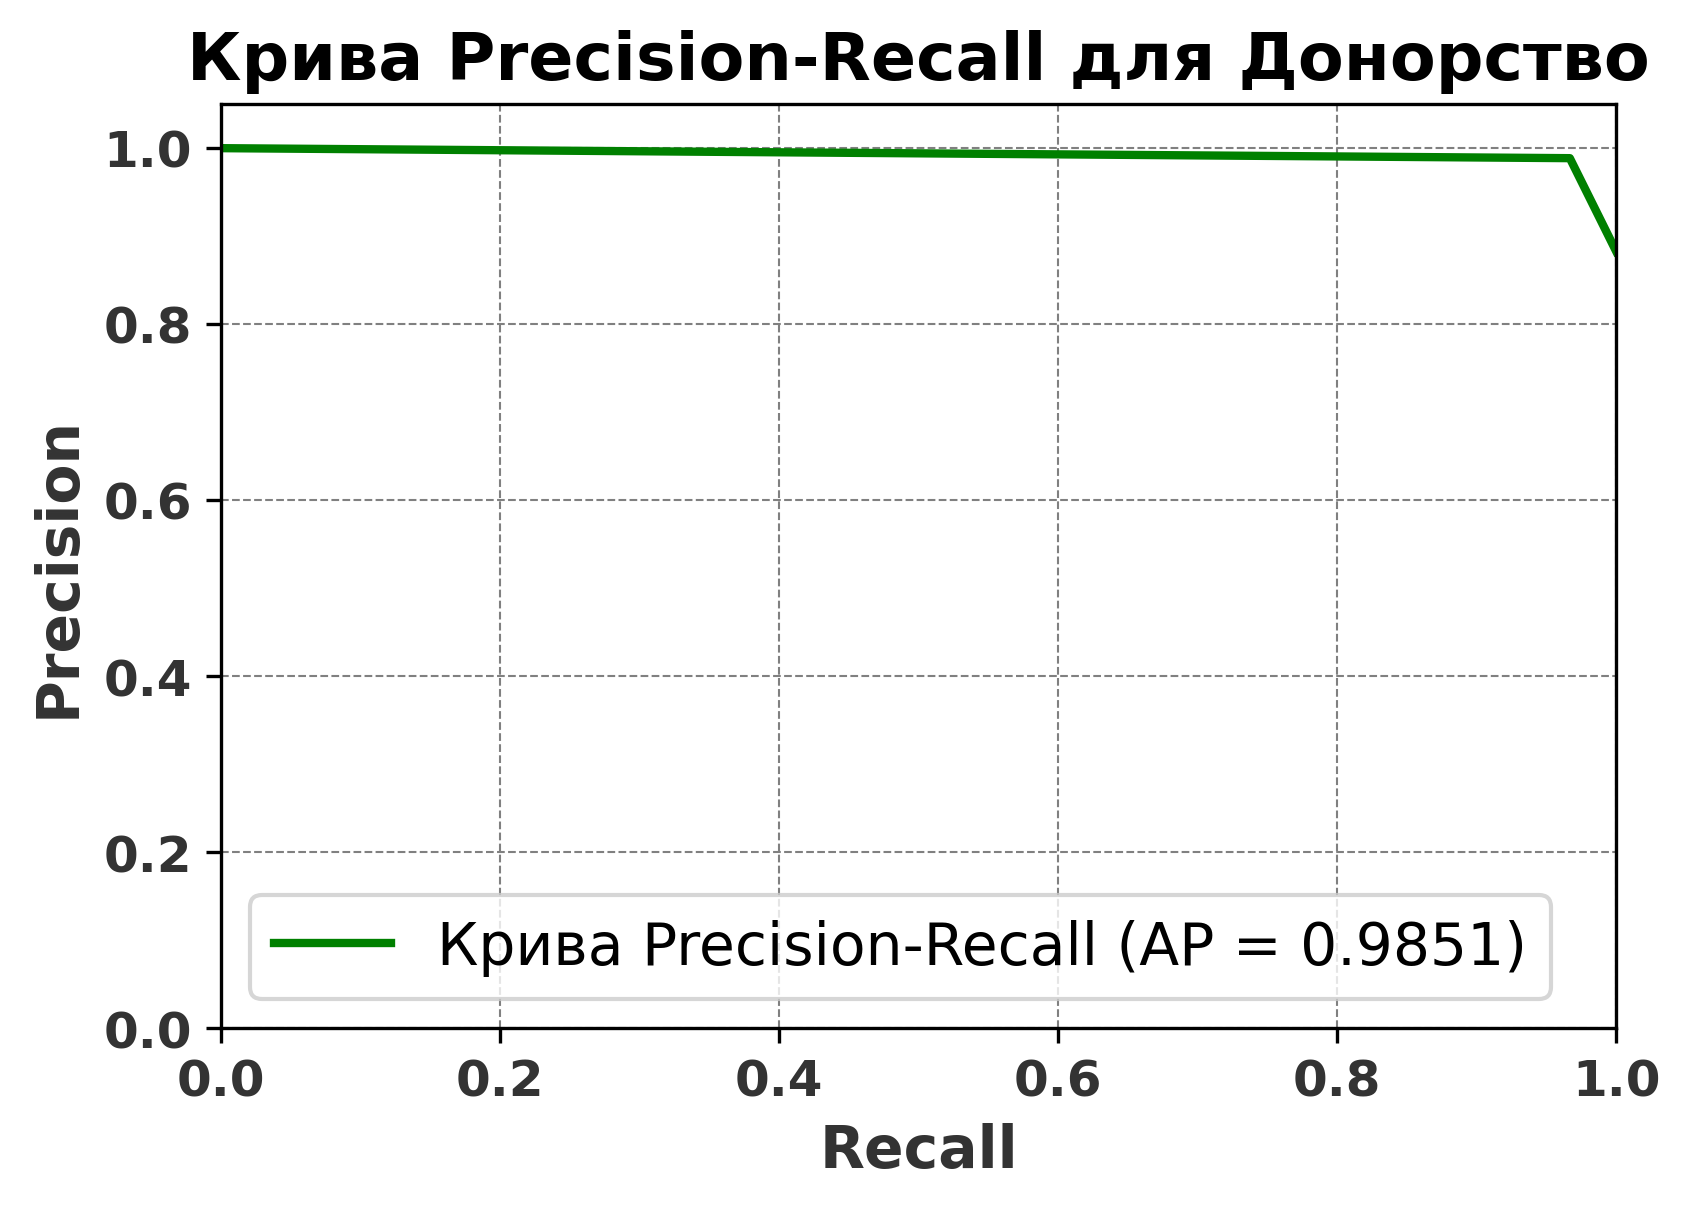

(array([0.88235294, 0.98863636, 1.        ]), array([1.        , 0.96666667, 0.        ]), 0.9850935828877005)
Precision-Recall curve for Донорство.csv plotted with average_precision:0.9851
Plot saved to ./projects_outscope/outscope_figs as ЕКЗ


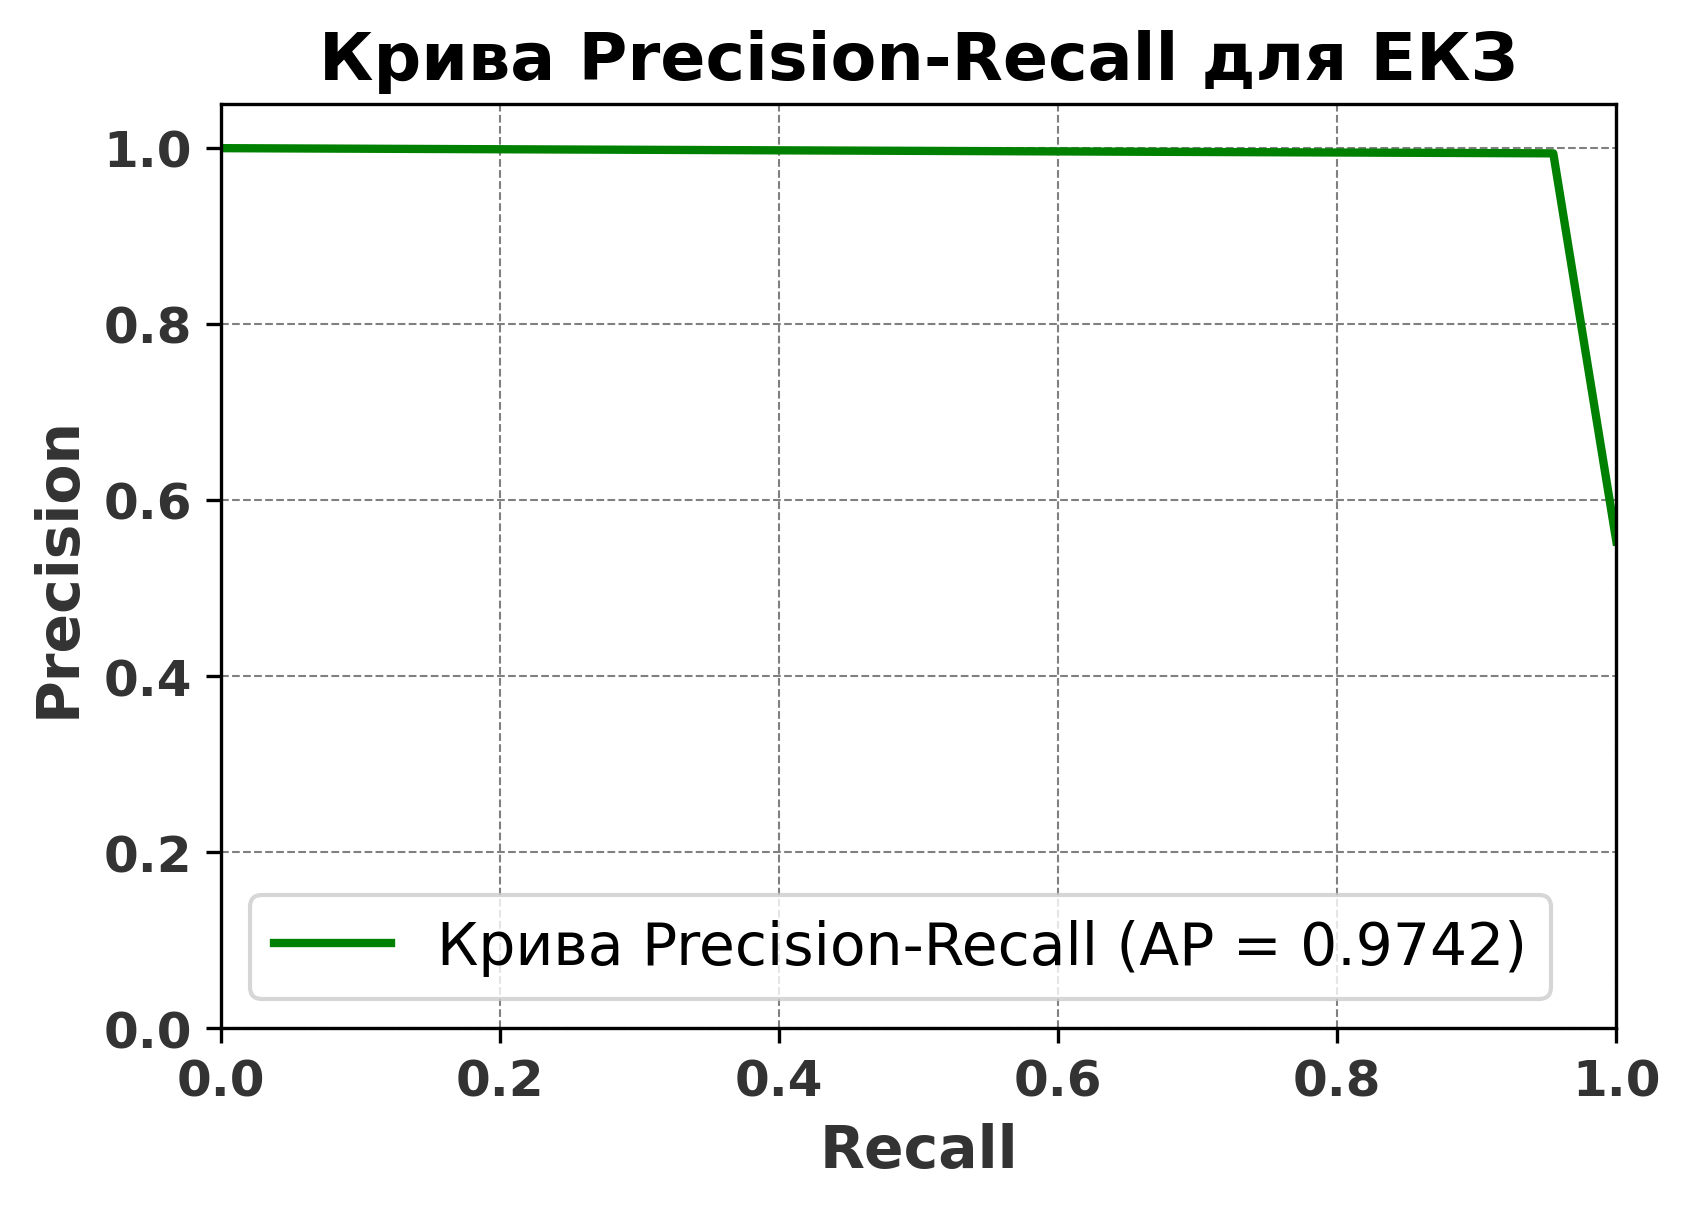

(array([0.553125  , 0.99411765, 1.        ]), array([1.        , 0.95480226, 0.        ]), 0.9741857760053174)
Precision-Recall curve for ЕКЗ.csv plotted with average_precision:0.9742
Plot saved to ./projects_outscope/outscope_figs as ЗМП


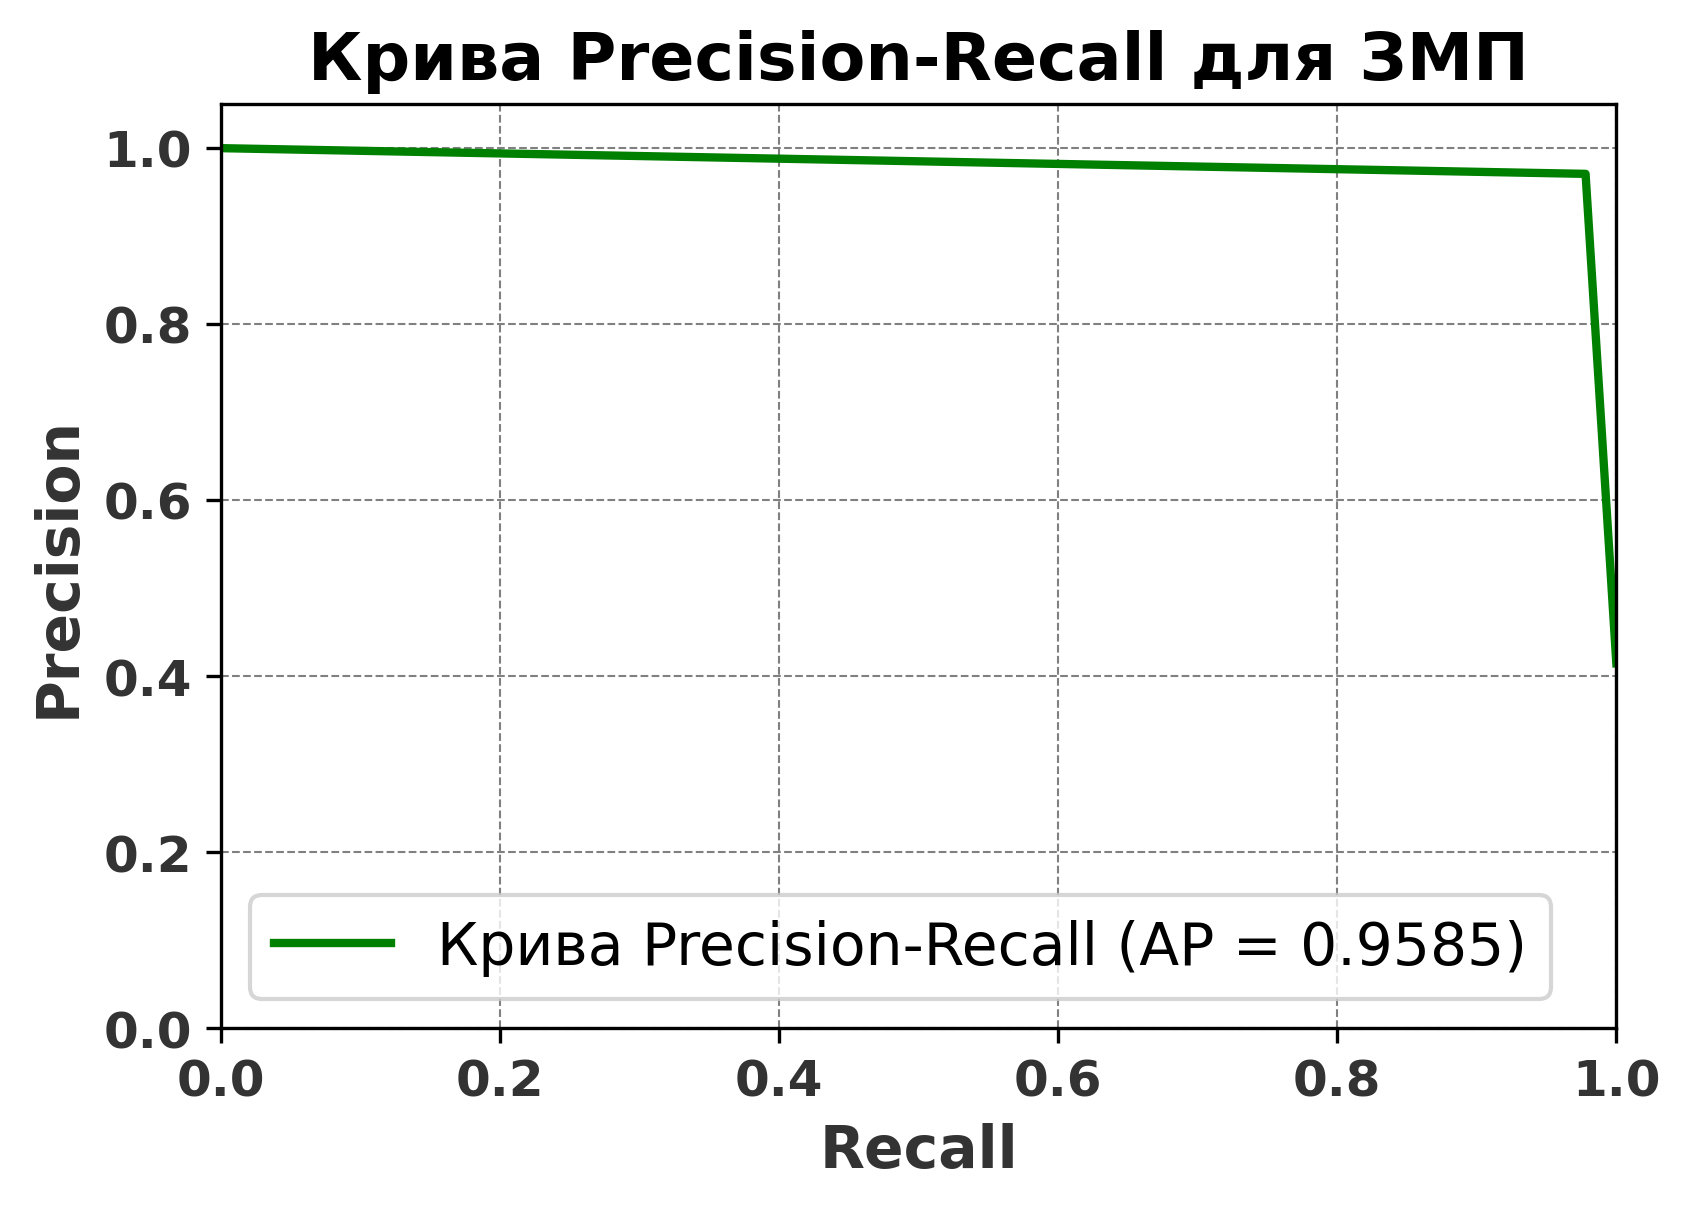

(array([0.41463415, 0.97080292, 1.        ]), array([1.        , 0.97794118, 0.        ]), 0.9585344908837667)
Precision-Recall curve for ЗМП.csv plotted with average_precision:0.9585
Plot saved to ./projects_outscope/outscope_figs as Можливість вакцинації


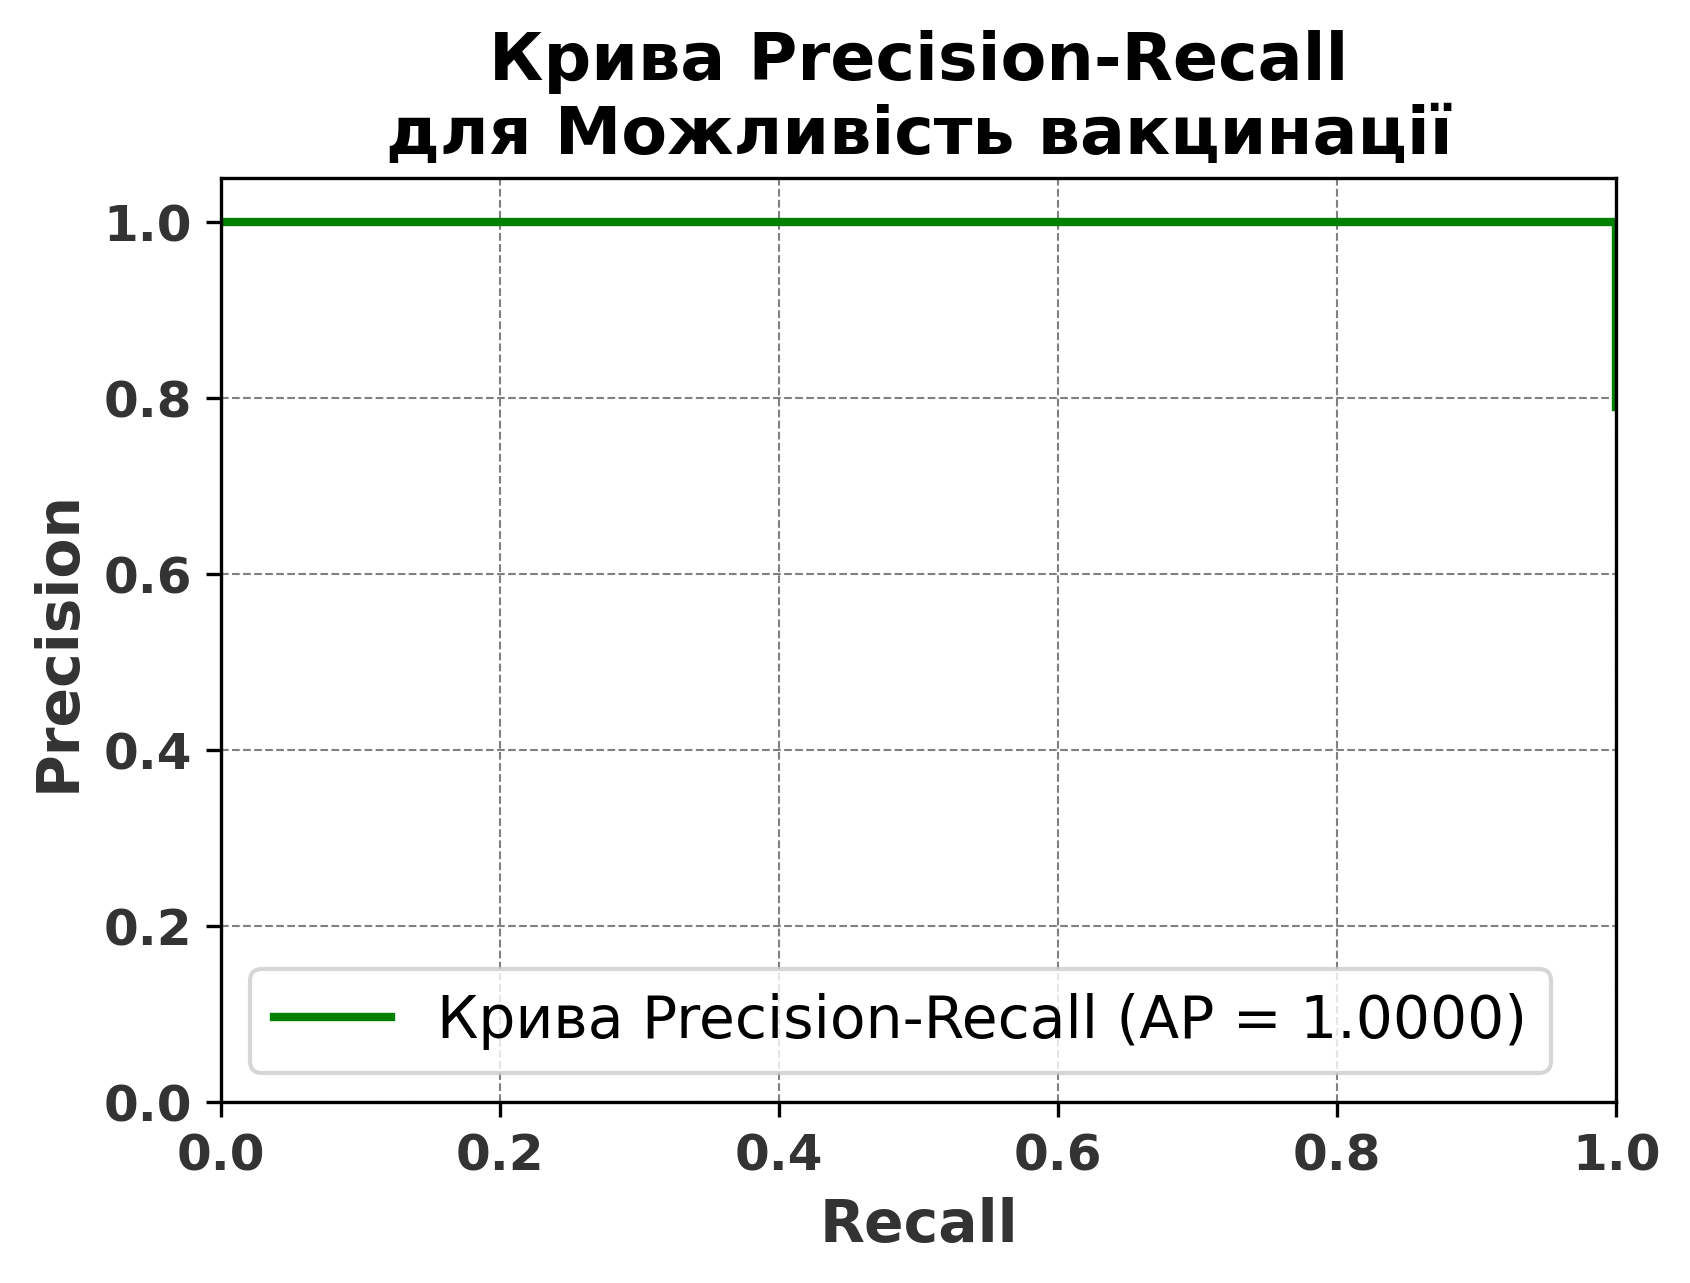

(array([0.79032258, 1.        , 1.        ]), array([1., 1., 0.]), 1.0)
Precision-Recall curve for Можливість вакцинації.csv plotted with average_precision:1.0000
Plot saved to ./projects_outscope/outscope_figs as Обов'язковість вакцинації


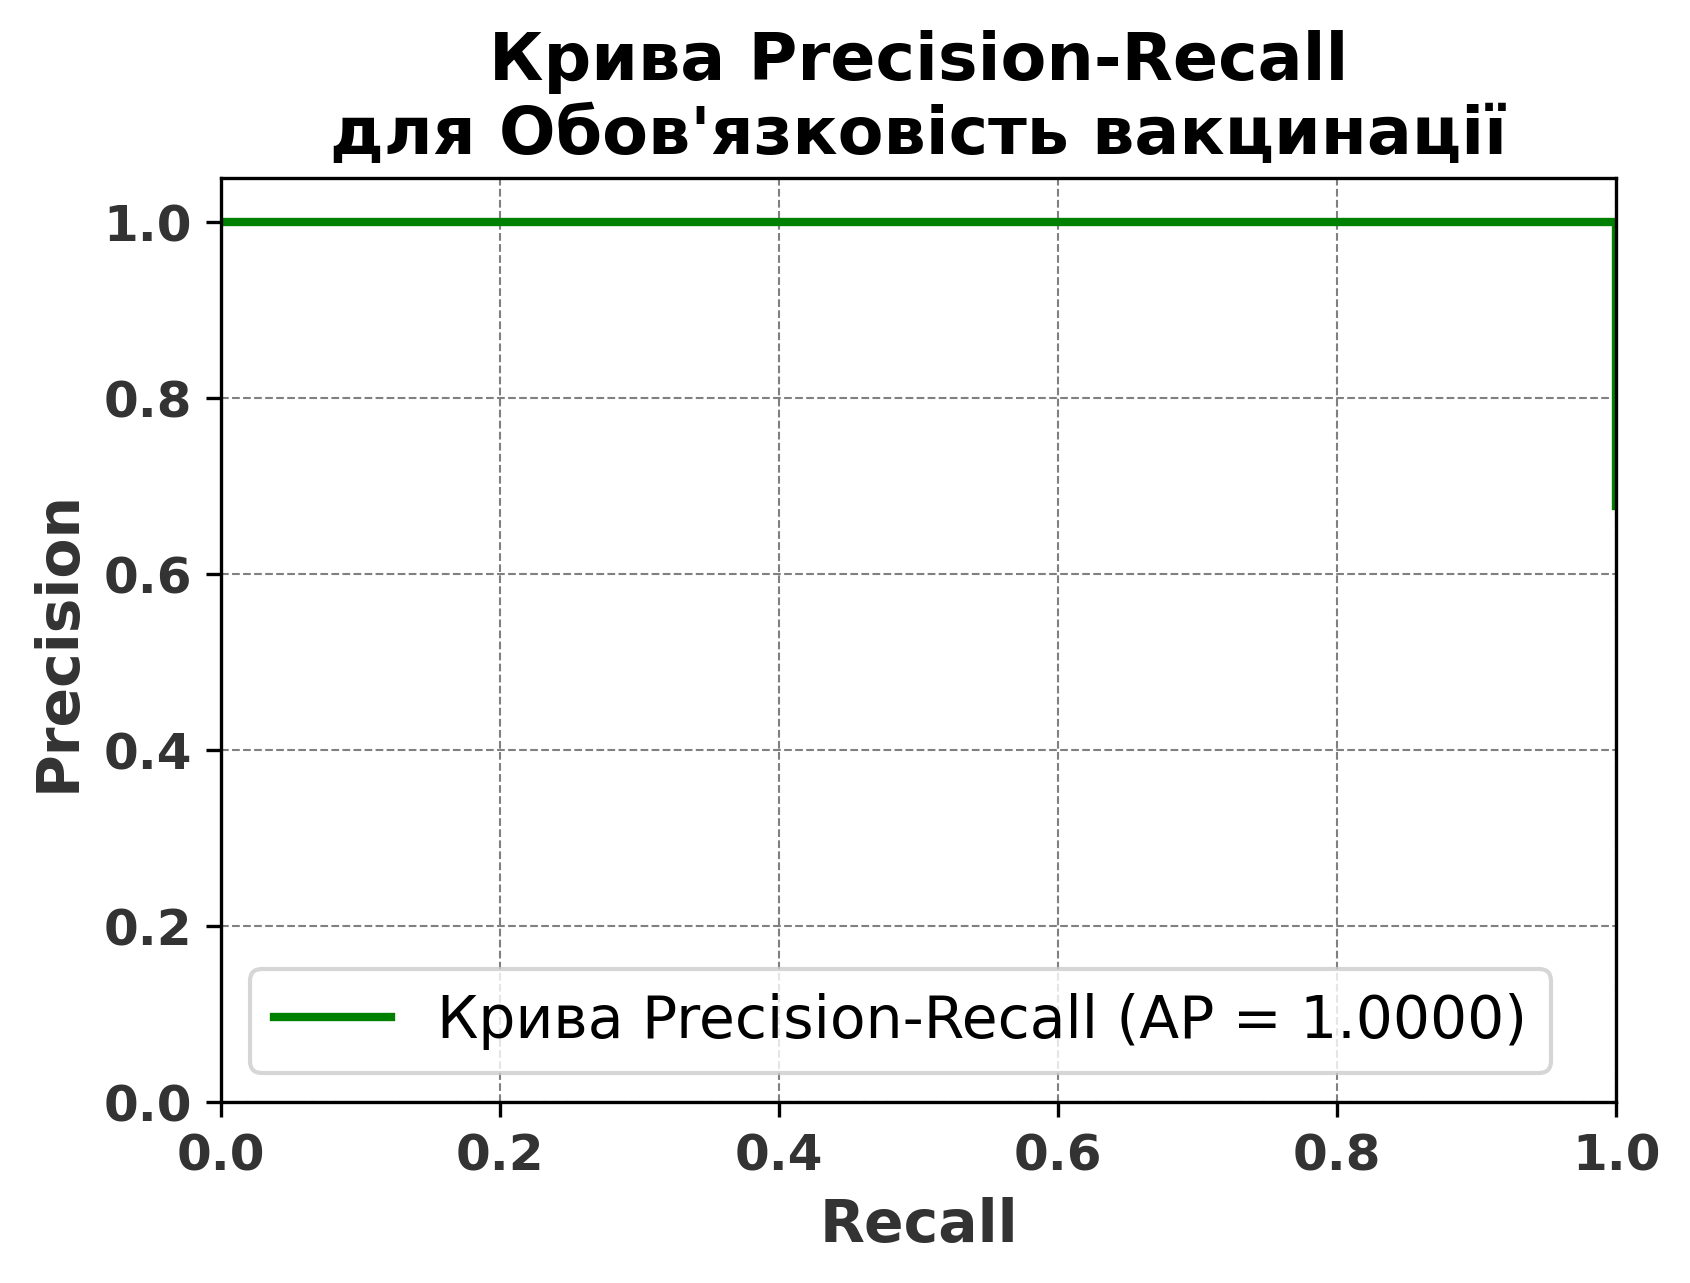

(array([0.67741935, 1.        , 1.        ]), array([1., 1., 0.]), 1.0)
Precision-Recall curve for Обов'язковість вакцинації.csv plotted with average_precision:1.0000
Plot saved to ./projects_outscope/outscope_figs as Стоматологія


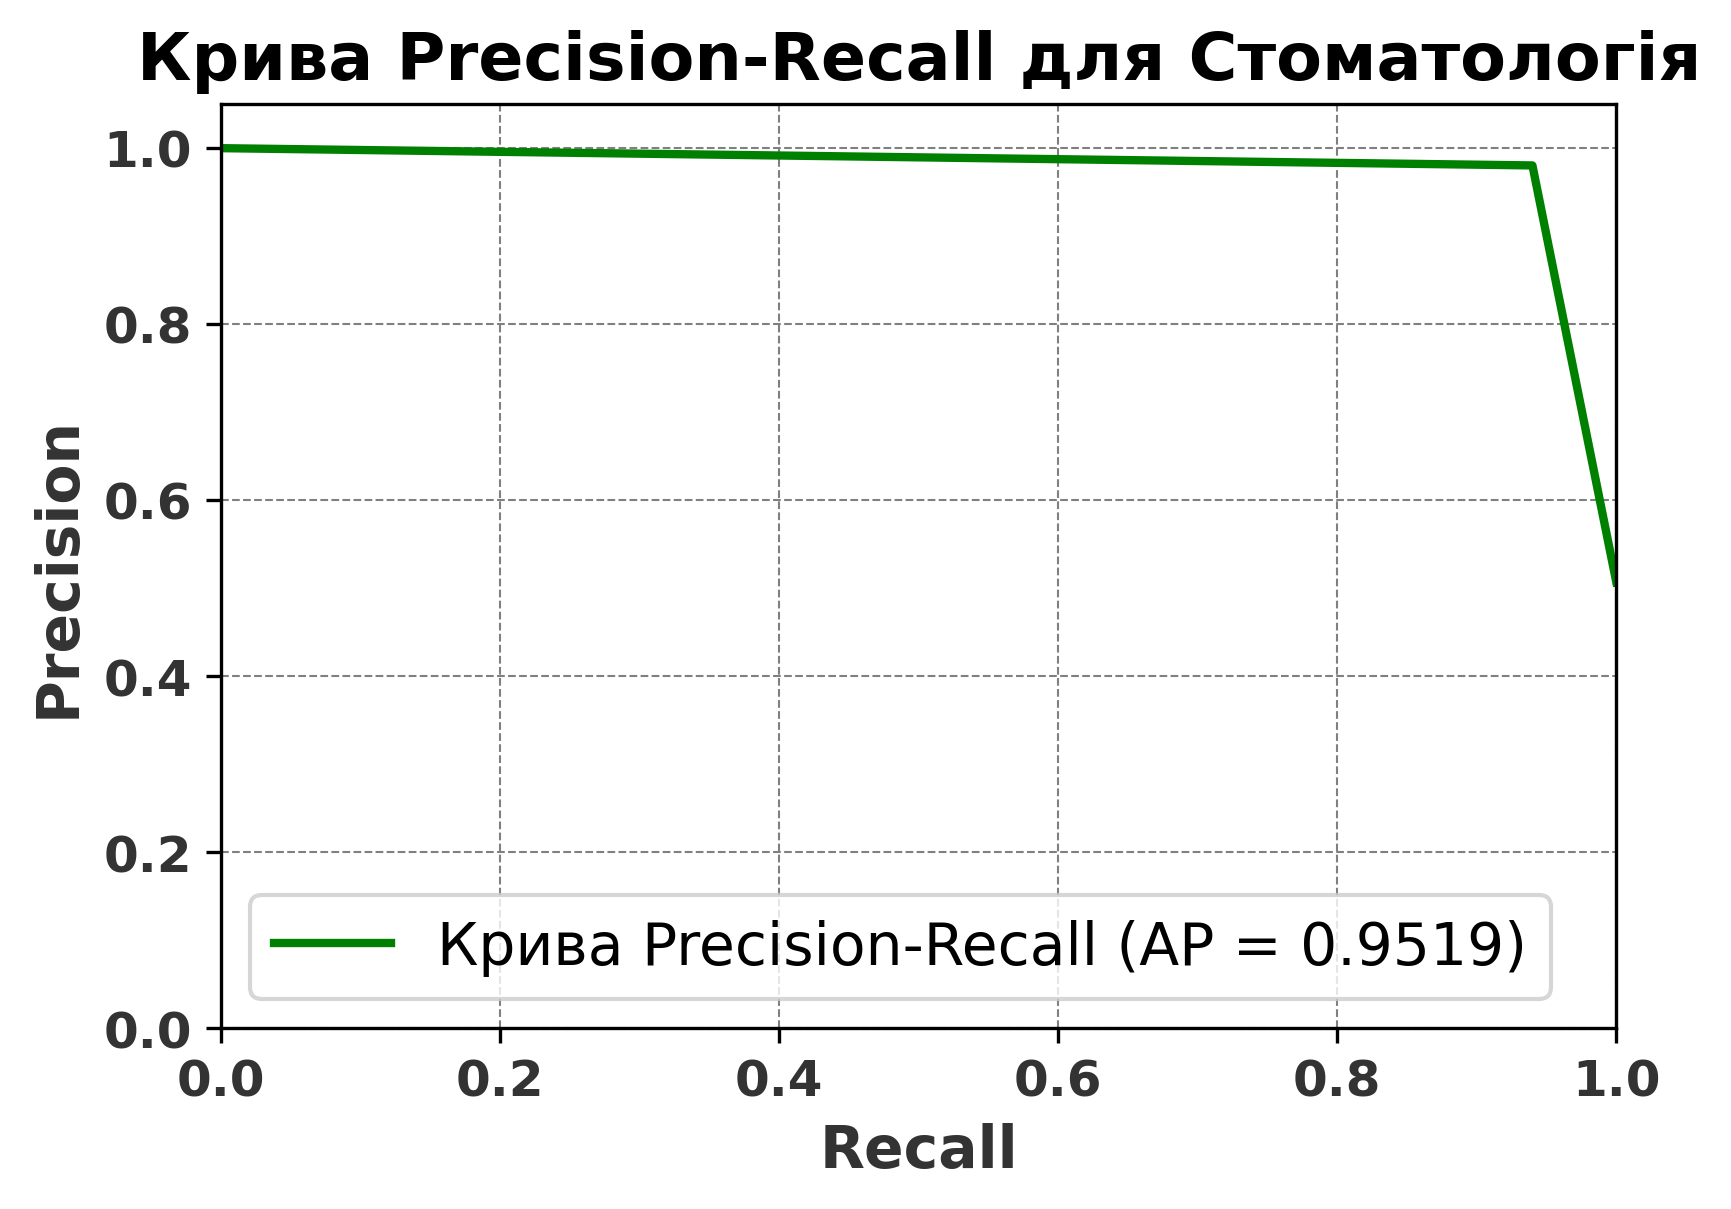

(array([0.50666667, 0.98039216, 1.        ]), array([1.        , 0.93984962, 0.        ]), 0.9518973905351613)
Precision-Recall curve for Стоматологія.csv plotted with average_precision:0.9519
Plot saved to ./projects_outscope/outscope_figs as Сурогатне


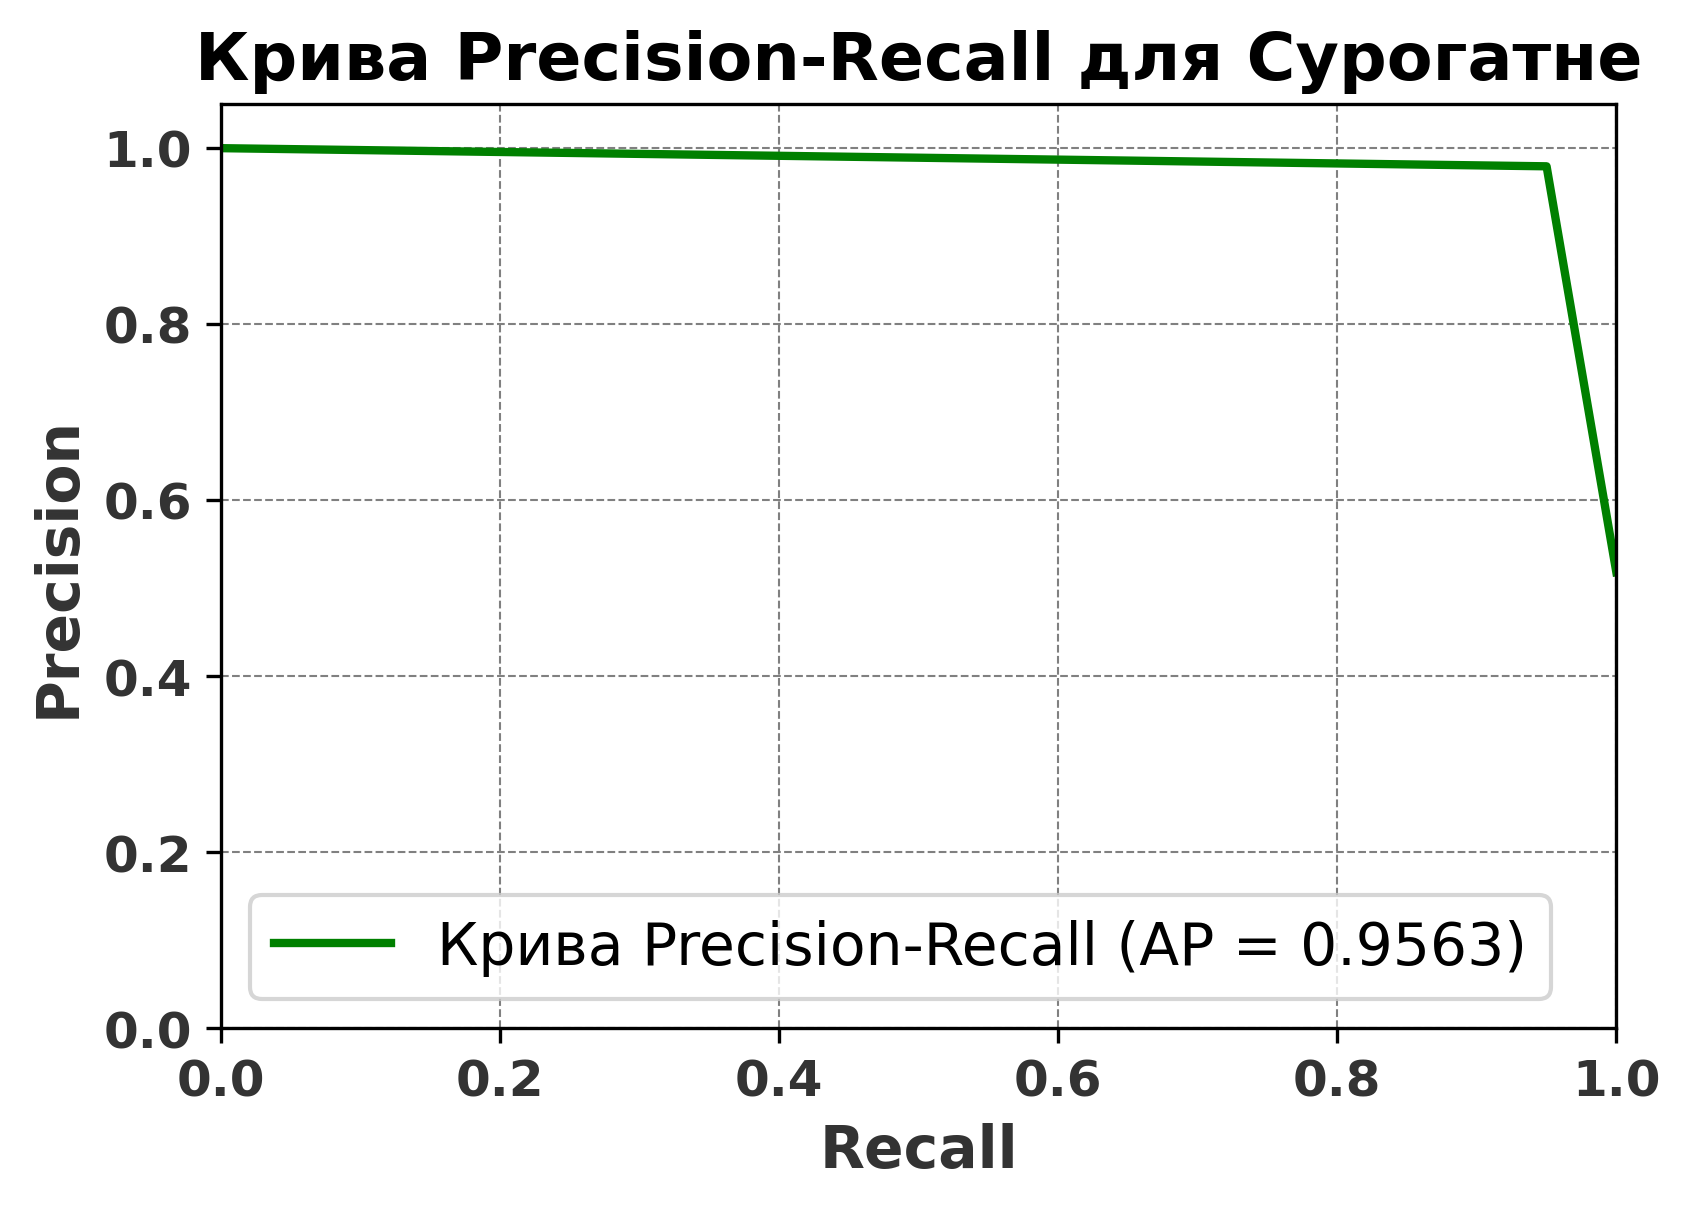

(array([0.51813472, 0.97938144, 1.        ]), array([1.  , 0.95, 0.  ]), 0.9563191068853159)
Precision-Recall curve for Сурогатне.csv plotted with average_precision:0.9563
Plot saved to ./projects_outscope/outscope_figs as Терапія


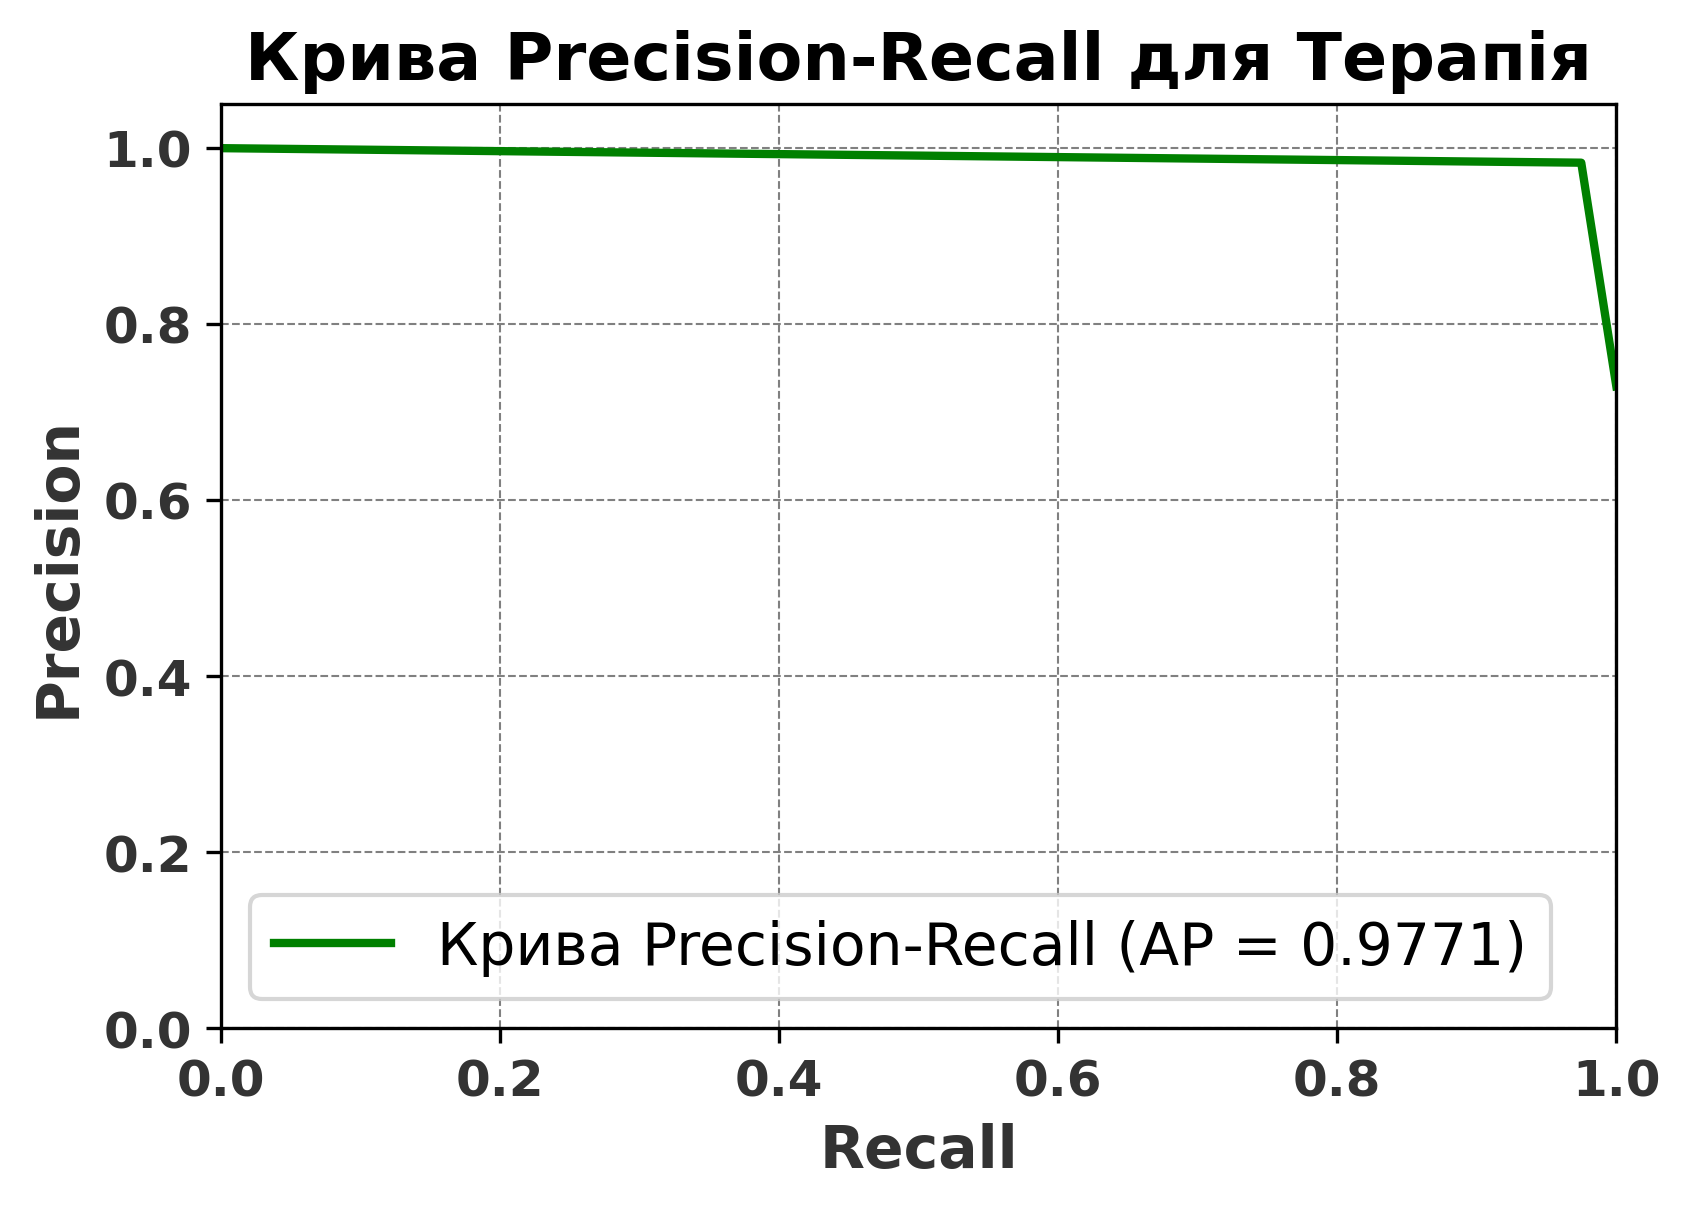

(array([0.7293578 , 0.98350254, 1.        ]), array([1.        , 0.97484277, 0.        ]), 0.9771089597086527)
Precision-Recall curve for Терапія.csv plotted with average_precision:0.9771
Plot saved to ./projects_outscope/outscope_figs as Трансплантація


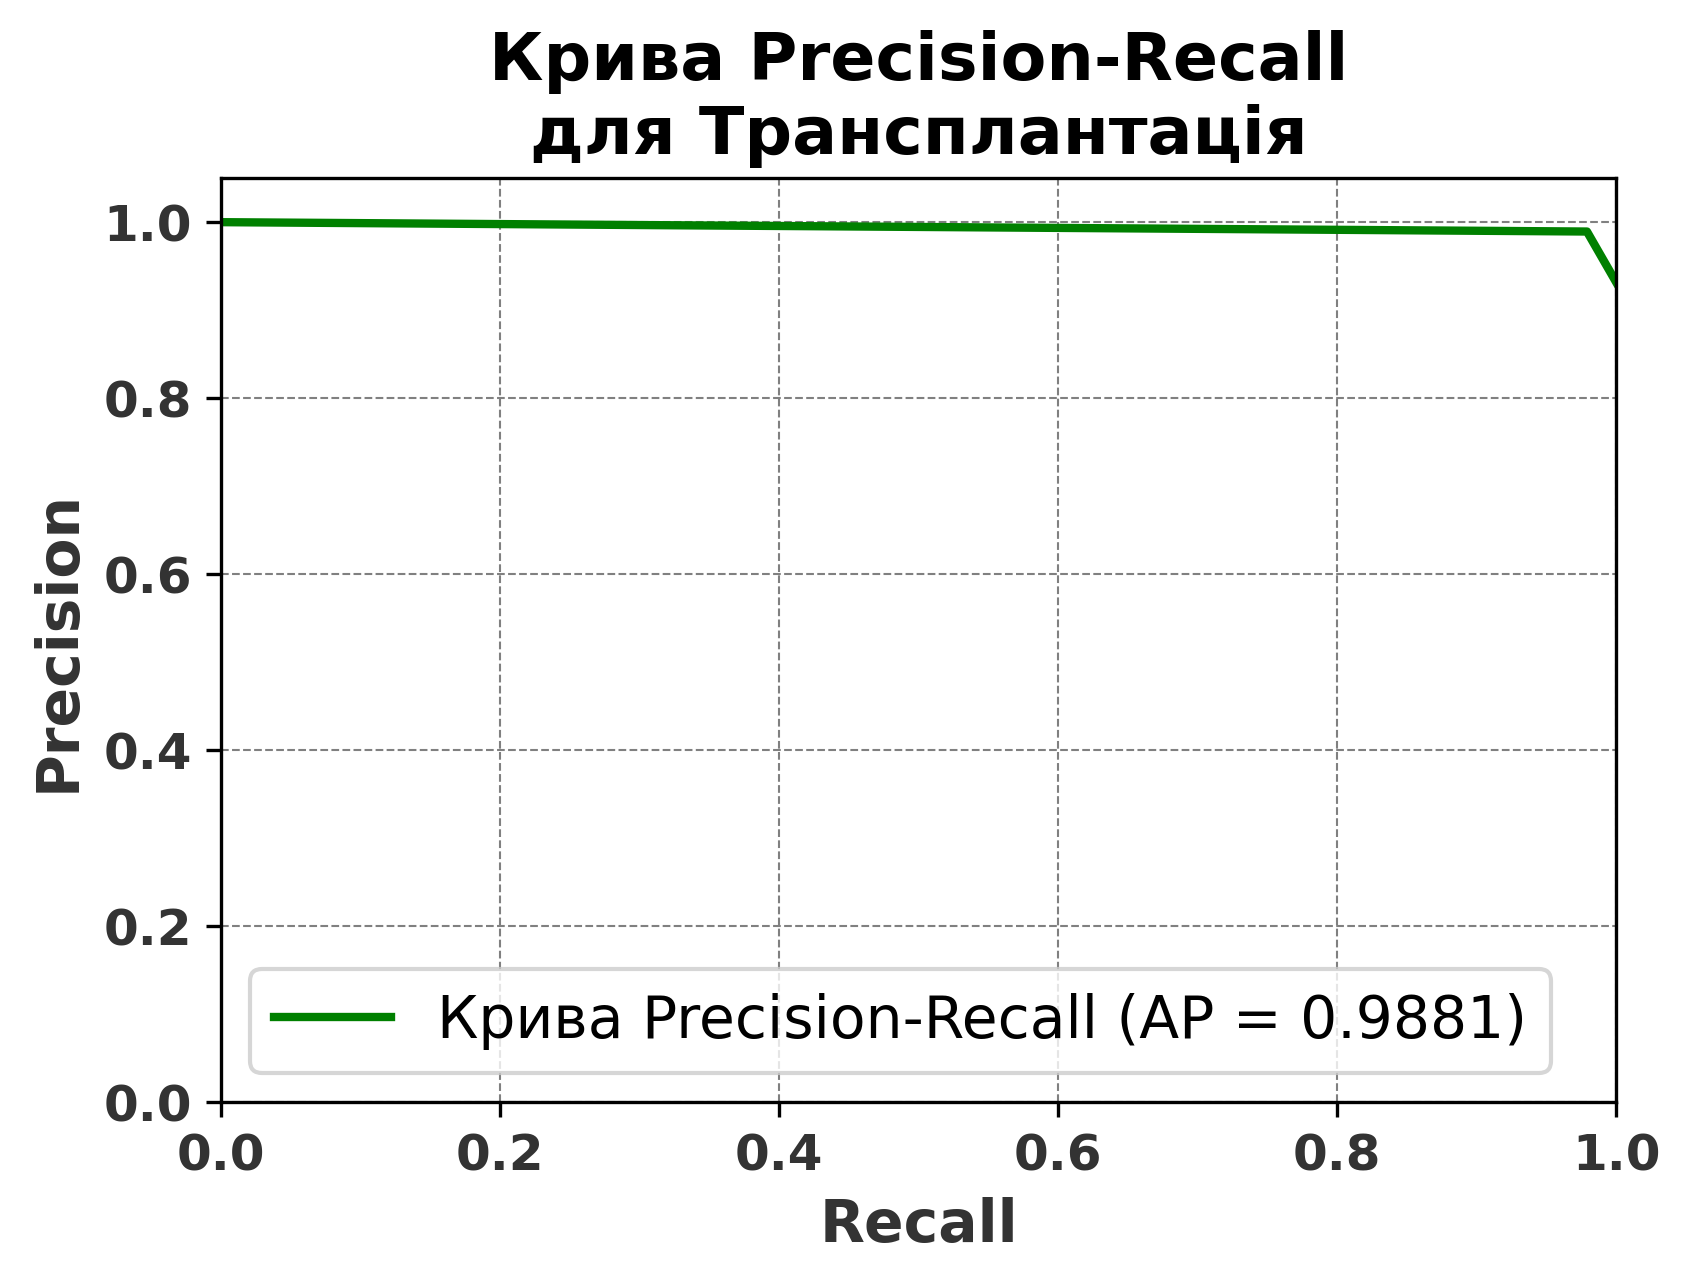

(array([0.93137255, 0.9893617 , 1.        ]), array([1.        , 0.97894737, 0.        ]), 0.9881408778517006)
Precision-Recall curve for Трансплантація.csv plotted with average_precision:0.9881
All ROC curves have been plotted and saved.


In [26]:
# Define the input and output folder paths
input_folder_csv = './projects_outscope/outscope_csv'
output_folder_figs = './projects_outscope/outscope_figs'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_figs):
    os.makedirs(output_folder_figs)

# Loop through each CSV file in the input folder
for file in os.listdir(input_folder_csv):
    if file.endswith('.csv'):
        file_path = os.path.join(input_folder_csv, file)
        df = pd.read_csv(file_path)

        # Check if the required columns are in the DataFrame
        if 'y_test' not in df.columns or 'y_pred' not in df.columns:
            print(f"Skipping file {file} as it does not contain 'y_test' and/or 'y_pred' columns.")
            continue

        y_test = df['y_test']
        y_pred = df['y_pred']

        figure_name = file.replace('.csv', '')
        # auc_score = plot_roc_skl_binary(y_test, y_pred, output_folder_figs, figure_name)
        precision_recall_score = plot_precision_recall_skl_binary(y_test, y_pred, output_folder_figs, figure_name)
        print(precision_recall_score)
        # print(f'ROC curve for {file} plotted with AUC: {auc_score:.4f}')
        print(f'Precision-Recall curve for {file} plotted with average_precision:{precision_recall_score[2]:.4f}')

print("All ROC curves have been plotted and saved.")
